In [1]:
using LinearAlgebra
using Plots

In [2]:
"""
    chase(a::T, b::T, c::T, d::T) where T <: AbstractVetor -> AbstrctVector
    
    追赶法求解线性方程组

# Aguments
- `a` 系数矩阵上对角线元素构成的向量
- `b` 系数矩阵主对角线元素构成的向量
- `c` 系数矩阵下对角线元素构成的向量
- `d` 常数项向量
"""
function chase(a::T, b::T, c::T, d::T) where T <: AbstractVector
    n = length(b)
    @assert n == length(d) == length(a)+1 == length(c) + 1
    x = zeros(Float64, n)
    for k in 1:n-1
        m = a[k] / b[k]
        b[k+1] -= c[k] * m
        d[k+1] -= d[k] * m
    end
    x[n] = d[n] / b[n]
    for k in n-1:-1:1
        x[k] = (d[k] - c[k] * x[k+1]) / b[k]
    end
    x
end

chase

In [14]:
"""
    solve(h::Float64, a::Number, b::Number) -> AbstractVector

    离散化微分方程并求解

# Aguments
- `h` 步长
- `a` 考虑区间的左端点
- `b` 考虑区间的右端点
"""
function solve(h::Float64,a::Number,b::Number)
    n = floor(Int, (b-a)/h)
    d = zeros(Float64, n+1)
    b = zeros(Float64, n+1)
    l = zeros(Float64, n)
    u = zeros(Float64, n)
    l = [-1/h for _ in 1:n]
    u = [-1/h for _ in 1:n]
    d[1] = 1/h - h/2
    for k in 2:n
        d[k] = 2/h - h
    end
    d[n+1] = 1/h - h/2
    b[1] = -1
    b[n+1] = cos(4)
    y = chase(u,d,l,b)
    y
end

solve

In [15]:
function error_plot(h, a, b, yₚ, uh)
    n = floor(Int, (b-a)/h)
    x_ = [k*h for k in 1:n+1]
    y_ = zeros(Float64, n+1)
    for k in 1:n+1
        y_[k] = uh(x_[k])
    end
    e = y_ - yₚ
    plot(x_, e)
end

error_plot (generic function with 1 method)

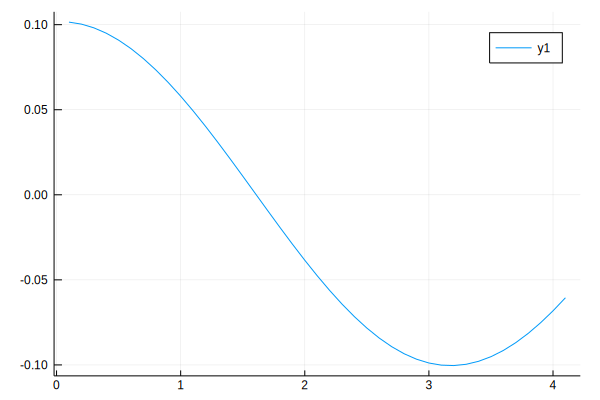

In [16]:
y = solve(0.1,0,4);
u(x) = sin(x)
error_plot(0.1, 0, 4, y, u)